## Introduction

The sinking of Titanic is one of the most notorious shipwrecks in the history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

Variable Description

    *    PassengerId: unique id number to each passenger
    *    Survived: passenger died (0) or survived (1)
    *    Pclass: passenger class
    *    Name: name
    *    Sex: gender of passenger
    *    Age: age of passenger
    *    SibSp: number of siblings/spouses
    *    Parch: number of parents/children
    *    Ticket: ticket number
    *    Fare: amount of money spent on ticket
    *    Cabin: cabin category
    *    Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)
    


In [ ]:
# !pip list

In [ ]:
#!pip install scikit-learn==0.23

In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download train.csv, test.csv and gender_submission.csv from kaggle, and upload to your google drive

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Machinelearning/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Machinelearning/data/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/Machinelearning/data/gender_submission.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 1. Concat Train data Test data, 2. reset index

In [ ]:
data = pd.concat([train,test])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
data.reset_index(inplace=True, drop=True)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 3.Data plot

<Axes: xlabel='Survived', ylabel='count'>

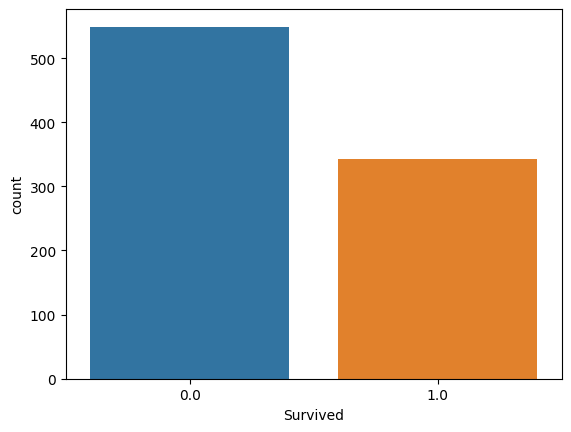

In [ ]:
sns.countplot(x=data['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

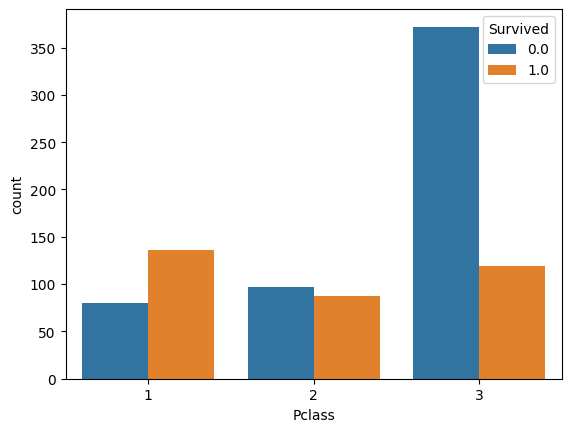

In [ ]:
sns.countplot(x=data['Pclass'], hue=data['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

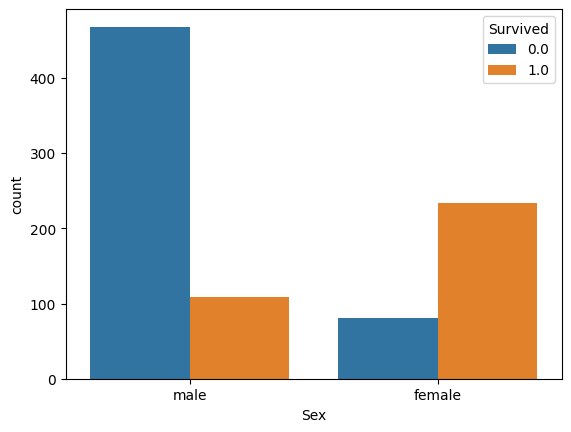

In [ ]:
sns.countplot(x=data['Sex'], hue=data['Survived'])

<Axes: xlabel='Embarked', ylabel='count'>

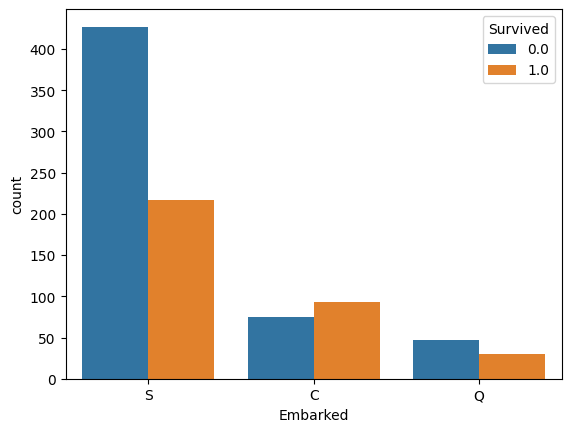

In [ ]:
sns.countplot(x=data['Embarked'], hue=data['Survived'])

# 4. Feature Engineering

Increase data['Family_size'], family=Parch + SibSp

In [ ]:
data['Family_Size'] = data['Parch'] + data['SibSp']

In [ ]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]

In [ ]:
data['Title1'].head()

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
3            Mrs. Jacques Heath (Lily May Peel)
4                             Mr. William Henry
Name: Title1, dtype: object

In [ ]:
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]

In [ ]:
data['Title1'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title1, dtype: object

In [ ]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [ ]:
data['Title1'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [ ]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 143.3+ KB


In [ ]:
data.drop('Ticket',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Family_Size  1309 non-null   int64  
 12  Title1       1309 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


## Fill missing values

Fill missing values of Embarked with "S", "C" or "Q"?



In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')  # 將資料中的"Embarked"欄位中的缺失值用'S'來填補

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
 11  Family_Size  1309 non-null   int64  
 12  Title1       1309 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


Fill missing values of Fare with ?

In [ ]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean()) # 將"Fare"欄位中的缺失值用該欄位的平均值來填補

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
 11  Family_Size  1309 non-null   int64  
 12  Title1       1309 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [ ]:
data['Cabin'].head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

In [ ]:
data["Cabin"].unique() # 顯示資料中"Cabin"欄位的所有唯一值

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Fill missing values of Cabin with X


In [ ]:
data['Cabin'] = data['Cabin'].fillna('X') # 將資料中的 "Cabin" 欄位中的缺失值用 'X' 來填補

Replace Cabin's value with the first character

In [ ]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0]) # 將"Cabin" 位中的每個值取出第一個字元，然後將這個字元賦值回 "Cabin" 欄位

In [ ]:
data["Cabin"].unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Fill missing values of Age with Mean

In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].mean()) # 將資料中的 "Age" 欄位中的缺失值用該欄位的平均值來填補

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Family_Size  1309 non-null   int64  
 12  Title1       1309 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Title1'],
      dtype='object')

<Axes: >

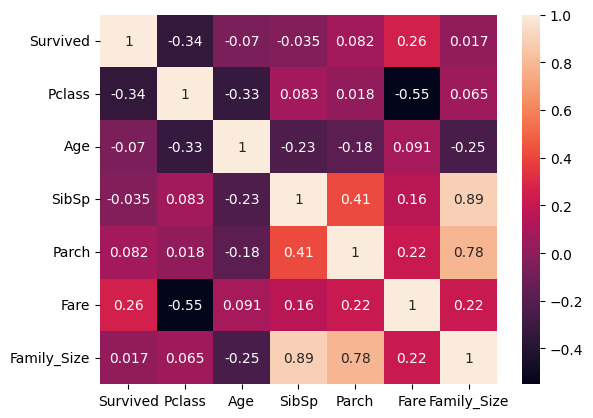

In [ ]:
import seaborn as sns
dataset = data.iloc[:892]
dataset = dataset[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Family_Size']]
sns.heatmap(dataset.corr(), annot=True) # dataset.corr() 用於計算這些欄位的相關係數 # https://ithelp.ithome.com.tw/articles/10205038 特徵與target 相關性 < 0.05 的時候可以del
# https://zhuanlan.zhihu.com/p/136771737 2特徵相關性 > 0.8 可以選擇其一

# LabelEncoding data['sex'], data['Embarked'], data['Pclass'], data['Title1'], data['Cabin']

# Do not use one hot encoding # ohe not for tree

In [ ]:
le = preprocessing.LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Pclass'] = le.fit_transform(data['Pclass'])
data['Title1'] = le.fit_transform(data['Title1'])
data['Cabin'] = le.fit_transform(data['Cabin'])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Title1
0,1,0.0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,8,2,1,2
1,2,1.0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,0,1,3
2,3,1.0,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,8,2,0,1
3,4,1.0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,1,3
4,5,0.0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,8,2,0,2


In [ ]:
data.drop('SibSp',axis=1, inplace=True)
data.drop('Parch',axis=1, inplace=True)

<ipython-input-42-e7f0a59ce956>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

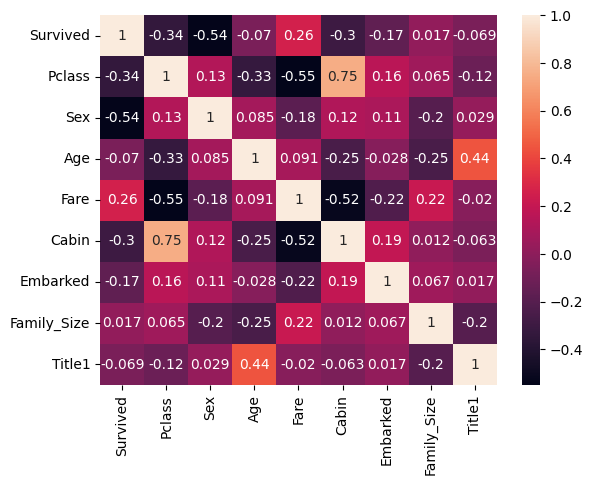

In [ ]:
dataset = data.iloc[:892]
dataset = dataset[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Cabin', 'Embarked', 'Family_Size', 'Title1']]
sns.heatmap(dataset.corr(), annot=True)

In [ ]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [ ]:
dataTrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Cabin', 'Embarked', 'Family_Size', 'Title1'],
      dtype='object')

In [ ]:
dataTest.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Cabin', 'Embarked', 'Family_Size', 'Title1'],
      dtype='object')

In [ ]:
# PassengerId 跟 Name 對於預測生存無意義
dataTrain = dataTrain.drop('PassengerId', axis=1) #PassengerId, ???
dataTrain = dataTrain.drop('Name', axis=1)
dataTrain.info()
dataTest = dataTest.drop(['PassengerId', 'Name'], axis=1) #PassengerId, Survived, ???
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Cabin        891 non-null    int64  
 6   Embarked     891 non-null    int64  
 7   Family_Size  891 non-null    int64  
 8   Title1       891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 69.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     0 non-null      float64
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 no

In [ ]:
dataTrain.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_Size,Title1
0,0.0,2,1,22.0,7.2500,8,2,1,2
1,1.0,0,0,38.0,71.2833,2,0,1,3
2,1.0,2,0,26.0,7.9250,8,2,0,1
3,1.0,0,0,35.0,53.1000,2,2,1,3
4,0.0,2,1,35.0,8.0500,8,2,0,2


In [ ]:
dataTest.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_Size,Title1
891,NaN,2,1,34.5,7.8292,8,1,0,2
892,NaN,2,0,47.0,7.0000,8,2,1,3
893,NaN,1,1,62.0,9.6875,8,1,0,2
894,NaN,2,1,27.0,8.6625,8,2,0,2
895,NaN,2,0,22.0,12.2875,8,2,2,3


## Model selection, find the best hyperparameters & model weights

In [ ]:
# Define X, y

In [ ]:
X, y = dataTrain.iloc[:,1:], dataTrain.iloc[:,0] # train_test_split not needed, it is already used in cv & gs
# [:, 1:] 表示取得所有列，但從第二欄開始的所有欄位
# [:, 0] 取得了訓練集中第一欄

In [ ]:
# SVM (特別適用於二元分類問題)
# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Pipeline是一種將多個處理步驟串聯在一起，形成一個單一模型的方法
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1)) # Use StandardScaler() in Pipeline to prevent test data leakage

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] # 定義了超參數 'C' 和 'gamma' 的範圍，用於進行網格搜尋

param_grid = [{'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}] # RBF 核函數的一個特點是它能夠處理複雜的非線性關係

svgs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=4) # cv=4 表示使用四折交叉驗證

scores = cross_val_score(svgs, X, y, scoring='accuracy', cv=5) # 使用交叉驗證計算模型的性能得分
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.826 +/- 0.028


In [ ]:
# 模型:SVC, 獲得 hyperparameters & model weights， 然後預測 X_submit

svgs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1) # 使用所有可用的CPU核心進行並行運算

svgs.fit(X, y)
print(svgs.best_score_)
print(svgs.best_params_)

0.838359173937606
{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [ ]:
svgsb = svgs.best_estimator_
svgsb.fit(X, y)
# svgsb.predict(X_submit) # see submit

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100.0, gamma=0.01, random_state=1))])

In [ ]:
# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfgs = GridSearchCV(estimator=RandomForestClassifier(random_state=1),     # StandardScaler() is not needed for trees!
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}], # max_depth 表示每棵樹的最大深度，None表示不限制深度
                  scoring='accuracy',
                  cv=4)

scores = cross_val_score(rfgs, X, y, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.819 +/- 0.016


In [ ]:
# 模型:RF, 獲得 hyperparameters & model weights， 然後預測 X_submit

rfgs = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=5)

rfgs.fit(X, y)
print(rfgs.best_score_)
print(rfgs.best_params_)

0.8271608813006089
{'max_depth': 5}


In [ ]:
rfgsb = rfgs.best_estimator_
rfgsb.fit(X, y)
# rfgsb.predict(X_submit) # see submit

RandomForestClassifier(max_depth=5, random_state=1)

In [ ]:
# XGB

In [ ]:
from xgboost.sklearn import XGBClassifier

xgbgs = GridSearchCV(estimator=XGBClassifier(n_estimators=500, tree_method='hist', device='cuda'), # StandardScaler() is not needed for trees!
                  param_grid=[{'reg_lambda': [0.6, 1.2, 1.8, 2.4]}], # reg_lambda 是 XGBoost 中用於控制L2正則化的參數
                  scoring='accuracy',
                  cv=4)

scores = cross_val_score(xgbgs, X, y, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:08:28] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


CV accuracy: 0.816 +/- 0.019


In [ ]:
# 模型:XGBoost, 獲得 hyperparameters & model weights， 然後預測 X_submit

xgbgs = GridSearchCV(estimator=XGBClassifier(n_estimators=500),     # StandardScaler() is not needed for trees!
                  param_grid=[{'reg_lambda': [0.6, 1.2, 1.8, 2.4]}],
                  scoring='accuracy',
                  cv=5)

xgbgs.fit(X, y)
print(xgbgs.best_score_)
print(xgbgs.best_params_)

0.8226853304877284
{'reg_lambda': 1.8}


In [ ]:
xgbgsb = xgbgs.best_estimator_
xgbgsb.fit(X, y)
# xgbgsb.predict(X_submit) # see submit

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1]:
# KNN(K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier()) # Use StandardScaler() in Pipeline to prevent test data leakage

param_range = [5, 8, 11, 14, 17, 20]

param_grid = [{'kneighborsclassifier__n_neighbors': param_range}]

knngs = GridSearchCV(estimator=pipe_knn,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=4)

scores = cross_val_score(knngs, X, y, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.823 +/- 0.026


In [ ]:
# 模型:KNN, 獲得 hyperparameters & model weights， 然後預測 X_submit

knngs = GridSearchCV(estimator=pipe_knn,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5)

knngs.fit(X, y)
print(knngs.best_score_)
print(knngs.best_params_)

0.8383780051471973
{'kneighborsclassifier__n_neighbors': 14}


In [ ]:
knngsb = knngs.best_estimator_
knngsb.fit(X, y)
# knngsb.predict(X_submit) # see submit

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=14))])

## Submit

In [ ]:
# single model prediction

# X_test_final = dataTest.iloc[:,1:]

# result = svgsb.predict(X_test_final)  # StandardScaler() already in Pipeline
# result = rfgsb.predict(X_test_final) # StandardScaler() not needed
# result = knngsb.predict(X_test_final)
# result = xgbgsb.predict(X_test_final) # StandardScaler() not needed

# submit['Survived'] = result
# submit['Survived'] = submit['Survived'].astype(int)
# submit.to_csv('/content/drive/MyDrive/Machinelearning/submit.csv', index= False)

In [ ]:
# multi model ensemble

X_test_final = dataTest.iloc[:,1:]

from sklearn.calibration import CalibratedClassifierCV

calibration_svg = CalibratedClassifierCV(svgs.best_estimator_,cv=5)
calibration_svg.fit(X, y)
yprob_s = calibration_svg.predict_proba(X_test_final)

calibration_rf = CalibratedClassifierCV(rfgs.best_estimator_,cv=5)
calibration_rf.fit(X, y)
yprob_r = calibration_rf.predict_proba(X_test_final)

calibration_xgb = CalibratedClassifierCV(xgbgs.best_estimator_,cv=5)
calibration_xgb.fit(X, y)
yprob_x = calibration_xgb.predict_proba(X_test_final)

calibration_knn = CalibratedClassifierCV(knngs.best_estimator_,cv=5)
calibration_knn.fit(X, y)
yprob_k = calibration_knn.predict_proba(X_test_final)

yprob_mean = (yprob_r + yprob_s + yprob_x + yprob_k)/4.0
result = yprob_mean.argmax(axis=1)

submit['Survived'] = result
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('/content/drive/MyDrive/Machinelearning/submit.csv', index= False) # The best:submit8

In [ ]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# 下載 submit.csv 上傳 https://www.kaggle.com/c/titanic/submit